In [1]:
%pylab inline
import pandas as pd
from scipy import stats, interpolate
import statsmodels.api as sm
polyfit = np.polynomial.polynomial.polyfit

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('./Jul5/1_0_1_outs_2/pipe_out_Tue_Jul__5_13_00_18_2016/statistics.csv')

In [45]:
def reg_analyze(data, title):
    sample_sizes = np.unique(data.sample_size.values)
    slopes = []
    errors = []
    ses = []
    print 'sample sizes:',sample_sizes
    for s in sample_sizes:
        subsample = data[data['sample_size'] == s]
#         print('samplesize:',s)
#         print('numberofpoints',subsample.shape[0])
        slope, intercept, r_value, p_value, std_err = stats.linregress(subsample['distance_to_COM'], subsample['unique_combos'])    
#         print('pvalue:',p_value)
#         print('rvalue:',r_value)
#         print('slope:',slope)
#         print('std_err', std_err)
#         print('intercept:',intercept)
#         print('NEGATIVE SLOPE:',(slope<0))
#         print('\n')
        print 's=',s
        print 'points in regression=',subsample.shape[0]
        print 'slope=',slope
        print 'error=',std_err
        print 'pvalue=',p_value
        print '<---->'
        slopes.append(slope)
        ses.append(s)
        errors.append(std_err)

    slopes = np.array(slopes)
    ses = np.array(ses)
    errors = np.array(errors)


    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(121)
    nanloc = np.isfinite(slopes)
    slopes = slopes[nanloc]
    ses = ses[nanloc]
    errors = errors[nanloc]
    ax1.errorbar(ses, slopes,yerr=errors,fmt='o')
    ax1.set_xlabel('sample size (s)')
    ax1.set_ylabel('slope of regression of U=f(r|s), a_s')
    # slope, intercept, r_value, p_value, std_err = stats.linregress(ses, slopes)
    # weights = 1/(errors**2)
    weights = 1/(errors)
    weights[np.isnan(weights)] = 0
    sm.tools.add_constant(slopes)
    mod_wls = sm.WLS(slopes,ses,weights=weights,)
    res_wls = mod_wls.fit()
    print(res_wls.summary())
    sss = np.linspace(2,23,25)
    ax1.plot(sss,res_wls.predict(sss),'r')
    ax1.set_ylim([-0.01, 0.005])
    ax1.set_title('Regression on the slopes of sample size vs unique combinations')
    ax2 = fig.add_subplot(122)
    ax2.hist(data.sample_size.values,np.linspace(0,32,32))
    ax2.set_xlabel('Sample Size')
    ax2.set_ylabel('Count')
    ax2.set_title('Counts of Sample size')

    ax1.text(5,0.002,'P(T>-8.602) = 0')

    fig.suptitle('Regression Analysis on Model ('+title+')', fontsize=15)

sample sizes: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 28 31 32]
s= 2
points in regression= 1281
slope= -0.000417577014488
error= 8.2206336972e-05
pvalue= 4.34259905951e-07
<---->
s= 3
points in regression= 774
slope= -0.000628058729973
error= 0.000154694558234
pvalue= 5.40786124162e-05
<---->
s= 4
points in regression= 523
slope= -0.000955729486403
error= 0.000239759016869
pvalue= 7.67224825618e-05
<---->
s= 5
points in regression= 419
slope= -0.00116708384213
error= 0.000329641978548
pvalue= 0.000444453221637
<---->
s= 6
points in regression= 334
slope= -0.00173046841803
error= 0.000425174919366
pvalue= 5.88036613318e-05
<---->
s= 7
points in regression= 236
slope= -0.00277505806808
error= 0.000574619211901
pvalue= 2.47540550357e-06
<---->
s= 8
points in regression= 231
slope= -0.00184671686177
error= 0.000552496184601
pvalue= 0.000969666484807
<---->
s= 9
points in regression= 200
slope= -0.00309384330566
error= 0.000648682309345
pvalue= 3.5770183

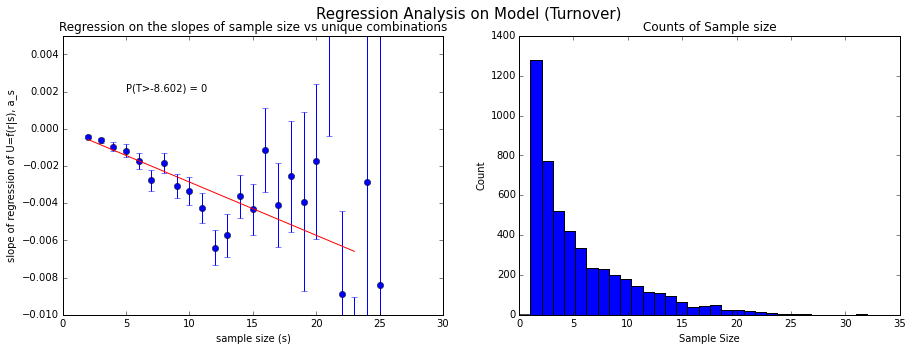

In [46]:
reg_analyze(pd.read_csv('./Jul5/1_0_1_outs_2/pipe_out_Tue_Jul__5_13_00_18_2016/statistics.csv'), 'Turnover')

sample sizes: [  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  26  27  28  29  30  31  32  33  34  35  36  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  78  79
  81  82  83  84  85  86  87  88  89  90  95  97 100 101 102 103 104 105
 106 107 108 110 111 112 114 115 116 117 118 122 123 124 130 133 134 135
 136 137 138 139 140 141 142 143 144 145 147 150 151]
s= 2
points in regression= 3
slope= 0.0
error= 0.0
pvalue= 1.0
<---->
s= 3
points in regression= 2
slope= 0.0
error= nan
pvalue= nan
<---->
s= 4
points in regression= 334
slope= 0.0
error= 0.0
pvalue= 1.0
<---->
s= 5
points in regression= 5
slope= 0.0
error= 0.0
pvalue= 1.0
<---->
s= 6
points in regression= 6
slope= 0.0
error= 0.0
pvalue= 1.0
<---->
s= 7
points in regression= 273
slope= 5.90815993347e-05
error= 0.000155699955052
pvalue= 0.704644928767
<---->
s= 8
points in regression= 390


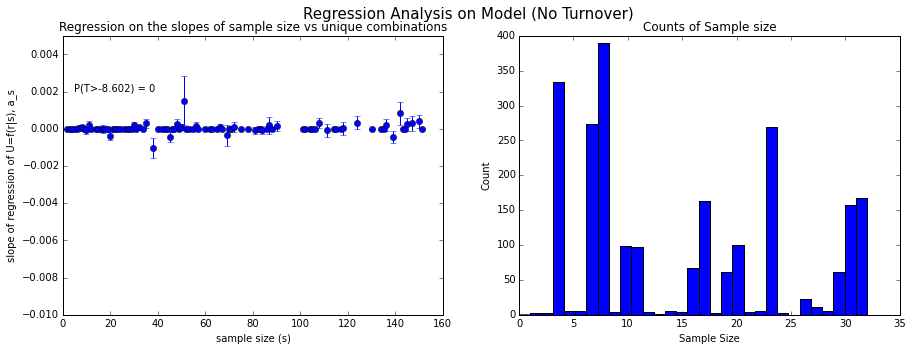

In [47]:
reg_analyze(pd.read_csv('./Jul5/1_0_0_outs_2/pipe_out_Mon_Jul__4_18_33_11_2016/statistics.csv'), 'No Turnover')

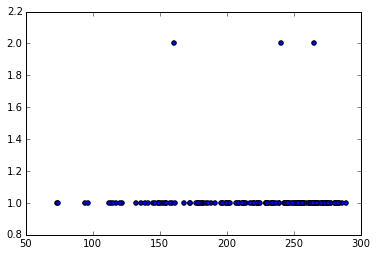

In [56]:
df = pd.read_csv('./Jul5/1_0_0_outs_2/pipe_out_Mon_Jul__4_18_33_11_2016/statistics.csv')
df = df[df['sample_size'] == 17]
plt.scatter(df['distance_to_COM'], df['unique_combos'])